In [12]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

thisdir = os.getcwd()
path = os.path.join(thisdir, "Data\subject_9.npz")
# for dirname, _, filenames in os.walk(path):
#     for file in filenames:
#         print(os.path.join(dirname, file))

In [11]:
loaded = np.load("Data/subject_9.npz")
data = loaded['data']
#get a specific silhouette
silh = data[0,0,:,:]
print(data.shape)


(9, 1200, 424, 512)


In [13]:
import numpy as np
loaded = np.load('Data/DIRO_skeletons.npz')

#get skeleton data of size (n_subject, n_gait, n_frame, 25*3)
data = loaded['data']

#get joint coordinates of a specific skeleton
skel = data[0,0,0,:]
x = [skel[i] for i in range(0, len(skel), 3)]
y = [skel[i] for i in range(1, len(skel), 3)]
z = [skel[i] for i in range(2, len(skel), 3)]

#get default separation
separation = loaded['split']

#print information
print(data.shape)
print(separation)

(9, 9, 1200, 75)
['train' 'test' 'train' 'test' 'train' 'train' 'test' 'test' 'train']


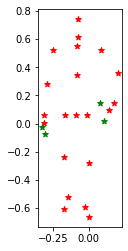

In [68]:
# Understand which index points to which joint

i = 0
j = 21
k = len(x)

fig, ax = plt.subplots()
ax.scatter(x[i:j], y[i:j], label= "stars", color= "red", marker= "*")
ax.scatter(x[j:k], y[j:k], label= "stars", color= "green", marker= "*")


ax.set_aspect(1)
plt.show()

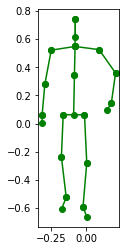

In [72]:
pairs = [
    (2,3),  (0,1), (3,20), (1,20),
    (4,5),  (5,6), (6,7), 
    (8,9),  (9,10),(10,11),
    (4,20), (8,20), 
    (12,16),
    (12,13),(13,14), (14,15),
    (16,17),(17,18), (18,19),
    ]

def plot_skeleton(x,y,z):
    fig, ax = plt.subplots()
    for (i,j) in pairs:
        plt.plot([x[i],x[j]], [y[i],y[j]], 'go', linestyle="-")

    ax.set_aspect(1)
    plt.show()
    
plot_skeleton(x,y,z)